#Вариант 5
#Вывести распределение количества объявлений в зависимости количества комнат.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv('/home/Rent.csv', delimiter=';')

 2. Структурируйте данные

In [4]:
print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())

Первые 5 строк данных:
    rent     s  floor  rooms  walls  district
0  24000  50.0      5      2      1         1
1  11250  15.0      1      1      0         2
2  30000  69.0      2      2      1         1
3  19500  39.0     12      1      0         4
4  12000  18.0      3      1      1         3

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      130 non-null    int64  
 1   s         130 non-null    float64
 2   floor     130 non-null    int64  
 3   rooms     130 non-null    int64  
 4   walls     130 non-null    int64  
 5   district  130 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.2 KB
None


3. Проанализируйте типы данных

In [5]:
print("\nТипы данных:")
print(data.dtypes)


Типы данных:
rent          int64
s           float64
floor         int64
rooms         int64
walls         int64
district      int64
dtype: object


4. Визуализируйте данные (Вариант 5: распределение количества объявлений в зависимости от количества комнат)

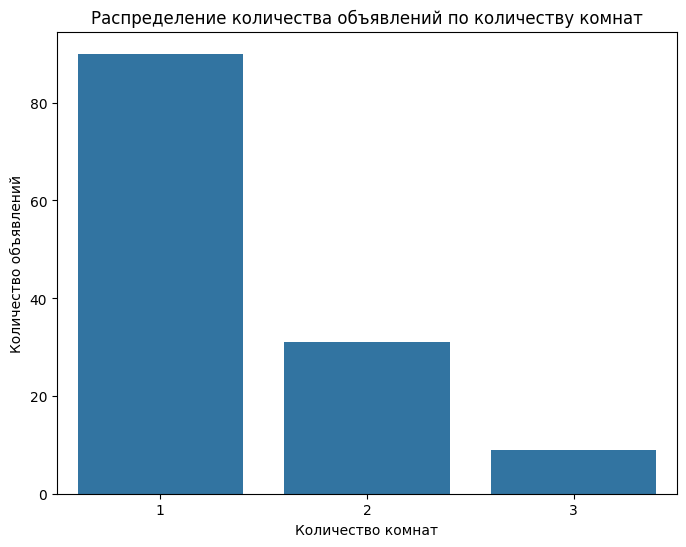

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rooms', data=data)
plt.title('Распределение количества объявлений по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

5. Проверить критерий асимметрии и эксцесса для распределения количества комнат

In [7]:
skewness = data['rooms'].skew()#Вычисление коэфициента ассиметрии
kurtosis = data['rooms'].kurtosis()#коэфициент эксцесса
print(f"\nКоэффициент асимметрии: {skewness}")
print(f"Коэффициент эксцесса: {kurtosis}")


Коэффициент асимметрии: 1.404406481730714
Коэффициент эксцесса: 0.8851705816420843


6. Проверить гипотезу о виде распределения (нормальность)

In [8]:
norm_test = stats.normaltest(data['rooms'])
print(f"\nТест на нормальность: статистика = {norm_test.statistic}, p-value = {norm_test.pvalue}")


Тест на нормальность: статистика = 31.69804820941845, p-value = 1.3087487737626627e-07


7. Оцените связь между показателями (например, связь между количеством комнат и стоимостью аренды)

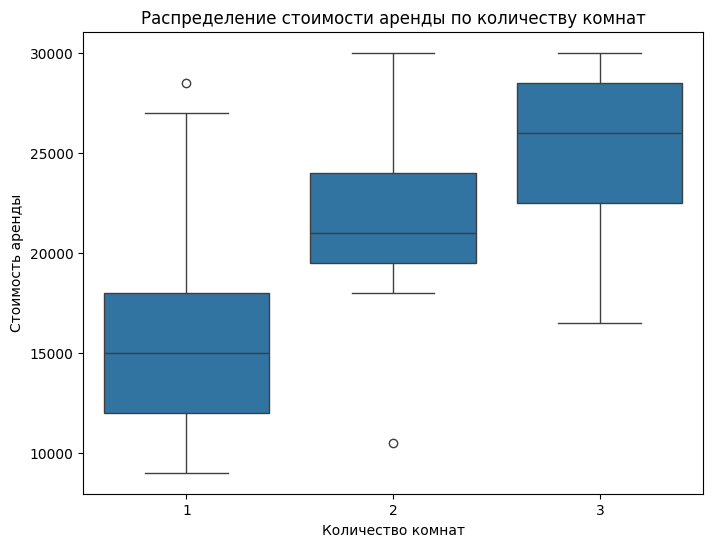

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rooms', y='rent', data=data)
plt.title('Распределение стоимости аренды по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость аренды')
plt.show()

8. Сформулируйте гипотезы H0 и H1 и проверьте их

In [10]:
# H0: Средняя стоимость аренды одинакова для квартир с 1 и 2 комнатами.
# H1: Средняя стоимость аренды различается для квартир с 1 и 2 комнатами.
rent_1room = data[data['rooms'] == 1]['rent']
rent_2rooms = data[data['rooms'] == 2]['rent']
mannwhitney_test = stats.mannwhitneyu(rent_1room, rent_2rooms)#непараметрический тест для сравнения медиан двух независимых выборок.
print(f"\nТест Манна-Уитни: статистика = {mannwhitney_test.statistic}, p-value = {mannwhitney_test.pvalue}")


Тест Манна-Уитни: статистика = 367.5, p-value = 9.343520572892661e-10


9. Определите регрессионную модель (например, зависимость стоимости аренды от площади и количества комнат)

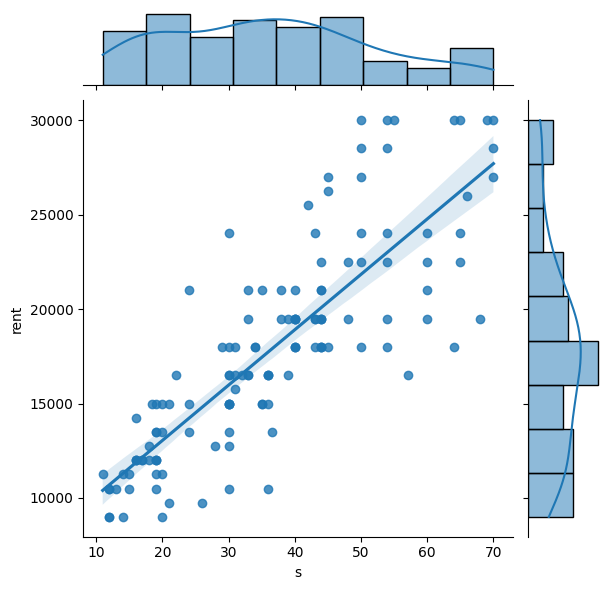


Результаты регрессионного анализа:
                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     142.7
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           3.28e-33
Time:                        05:12:55   Log-Likelihood:                -1228.3
No. Observations:                 130   AIC:                             2463.
Df Residuals:                     127   BIC:                             2471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7255

In [11]:
# Визуализация диаграммы рассеяния
sns.jointplot(x='s', y='rent', data=data, kind='reg')
plt.show()

# Построение регрессионной модели
X = data[['s', 'rooms']]
y = data['rent']
X = sm.add_constant(X)  # Добавляем константу
model = sm.OLS(y, X).fit()
print("\nРезультаты регрессионного анализа:")
print(model.summary())